In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

### Khởi tạo data

In [2]:
N = 200
a = 5
b = -10
# tien = 5*so_luong_khach - 10
so_luong_khach = np.arange(50,50+N,5)
print(so_luong_khach)

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225
 230 235 240 245]


In [3]:
tien = np.random.normal(0,40, [N//5])
doanh_thu = tien + a*so_luong_khach + b

print(doanh_thu)

[ 260.373  266.185  303.162  305.532  305.275  274.61   384.776  321.768
  410.227  510.804  485.165  502.159  613.636  600.282  579.816  656.722
  579.587  680.175  710.946  711.622  815.044  710.717  860.908  859.75
  899.505  883.921 1015.537  869.892  980.894  978.386  957.008  983.788
  989.389 1063.833 1085.886 1037.183 1113.18  1196.956 1212.66  1165.888]


# 1. Linear Regression

In [4]:
# Khởi tạo và kiểm tra mô hình
khoi_tao_A = 10.
khoi_tao_B = 10.

In [5]:
# Hàm tính loss
def tinh_loss(predictions, targets):
    mse = np.mean((predictions - targets) ** 2)
    return mse

# Hàm Hồi Quy Tuyến Tính, trả về 2 số a và b của mô hình cần tìm
def linear_regression(x, y, he_so_huan_luyen=0.00001, so_lan_hoc=200):
    a = khoi_tao_A
    b = khoi_tao_B
    
    # Lặp đi lặp lại quá trình cập nhật a và b
    for i in range(so_lan_hoc):
        y_du_doan = x*a + b
        error = tinh_loss(y_du_doan, y)
        if i%10 == 0: print(error)
        
        # Tính gradient
        gradient_a = (x * 1e-5*error).sum()
        gradient_b = 1e-1*error
        
        # Cập nhật a và b
        a = a - he_so_huan_luyen * gradient_a
        b = b - he_so_huan_luyen * gradient_b
    return a,b

new_a, new_b = linear_regression(so_luong_khach, doanh_thu)
print("Gia tri cua a va b sau khi hoc:", new_a, new_b)

657171.6461122982
200801.15587523597
97541.90151499308
57905.30385520602
38517.00570010822
27584.554849566426
20811.93529694774
16325.343022070016
13200.006174448703
10936.257304891467
9244.694120173082
7948.20499573212
6933.4336785963005
6125.082952256739
5471.545722298258
4936.493648894087
4493.757628878407
4124.105493518978
3813.1537251543205
3549.978945527569
Gia tri cua a va b sau khi hoc: 5.145996268966748 1.7728750321470208


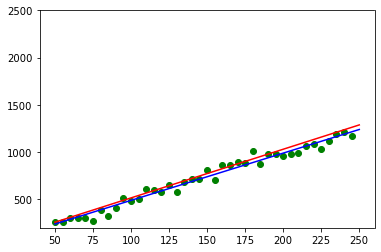

In [7]:
# Hàm vẽ phương trình y = ax + b
def Ve_phuong_trinh(heso_a, heso_b, mau='red'):
    x1,x2 = 50, 250
    
    y1 = heso_a*x1 + heso_b
    y2 = heso_a*x2 + heso_b
    plt.plot([x1,x2],[y1,y2], color=mau)

fig = plt.figure(figsize=(6,4))
plt.ylim([200, 2500])

plt.scatter(so_luong_khach, doanh_thu, color="green")
Ve_phuong_trinh(a,b, mau='blue')
Ve_phuong_trinh(new_a, new_b, mau="red")

plt.show()

# 2. Dự đoán dữ liệu test

In [38]:
# Giải sử ta quan sát thấy tập test như sau
x_test = np.array([78, 152, 221])
y_test = np.array([420, 763, 1215])

In [12]:
y_hat  = new_a * x_test + new_b
print(y_hat)

[ 403.161  783.964 1139.038]


### 2.0. Lỗi (residual)

In [14]:
error0 = y_hat[0] - y_test[0]
print(error0)

-16.83941598844666


In [21]:
(y_hat - y_test)**2

array([ 283.566,  439.502, 5770.218])

### Bias và Variance

In [18]:
bias_squared = (y_test - y_hat.mean())**2
print(bias_squared)

[126300.38     153.454 193259.02 ]


In [20]:
variance = np.mean((y_hat - y_hat.mean())**2)
print(variance)

90289.38716003795


### 2.1. Các loại lỗi phổ biến: MSE, MAE, RMSE, MAPE

In [24]:
mse = np.mean((y_hat - y_test)**2)
print(mse)

2164.4286376706564


In [26]:
mae = np.mean(np.abs(y_hat - y_test))
print(mae)

37.92189114324699


In [27]:
rmse = np.sqrt(mse)
print(rmse)

46.52342031354376


**MAPE**

In [29]:
error0_pct = 100*np.abs(y_hat[0] - y_test[0])/y_test[0]
print(error0_pct)

4.009384759153967


In [31]:
mape = 100*np.mean(np.abs(y_hat - y_test)/y_test)
print(mape)

4.3363375940336715


### 2.2. R-squared và Adjusted-R-squared

**Tự tính R-squared theo công thức**

In [32]:
sse = np.sum((y_hat - y_test)**2)
print(sse)

6493.285913011969


In [34]:
sst = np.sum((y_test - y_test.mean())**2)
print(sst)

317992.6666666667


In [35]:
r2 = 1 - sse/sst
print(r2)

0.979580391016317


**Kiểm tra lại với hàm của sklearn**

In [37]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_hat)
print(r2_score)

0.979580391016317


**Adjusted R-squared**
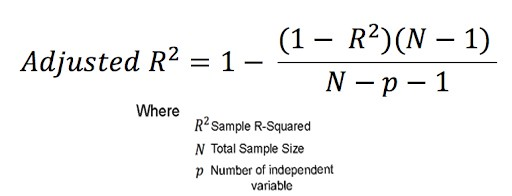

In [39]:
adjusted_r2 = 1 - (1-r2)*(3-1)/(3 - 1 - 1)
print(adjusted_r2)

0.959160782032634
